# Volume Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta


In [2]:
ticker="MSFT"
start_date="2020-01-01"
end_date="2025-05-13"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,153.323257,153.428261,151.137295,151.566850,22622100
2020-01-03,151.414154,152.683736,150.879596,151.127794,21116200
2020-01-06,151.805496,151.872323,149.399972,149.944085,20813700
2020-01-07,150.421371,152.416422,150.173188,152.082331,21634100
2020-01-08,152.817352,153.495104,150.774570,151.710046,27746500


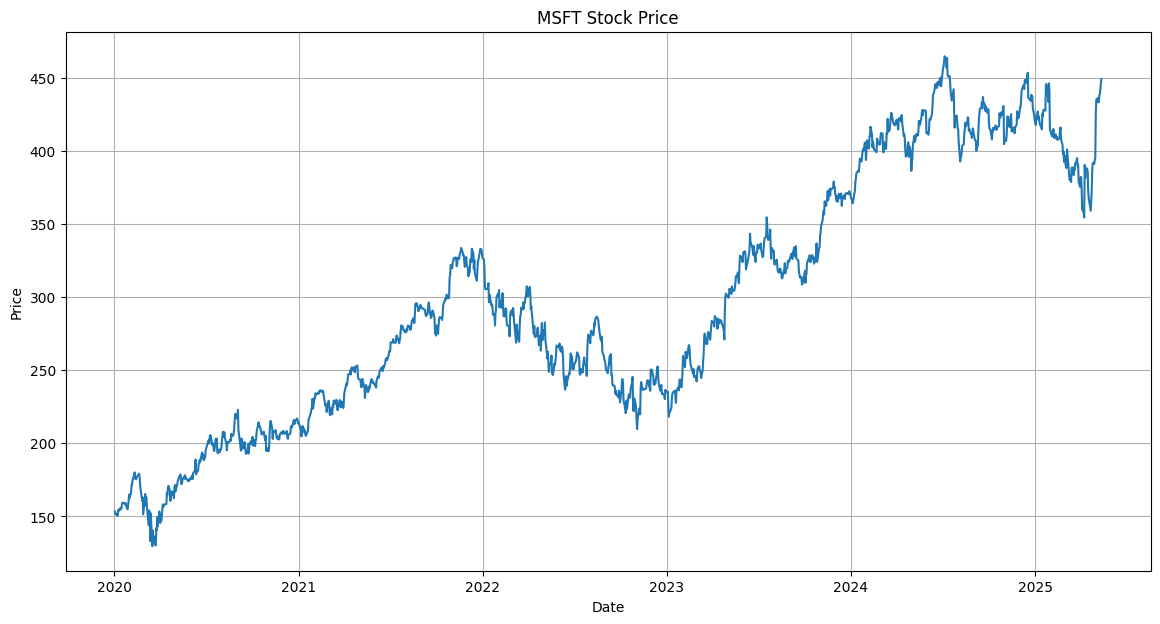

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Volume Analysis (การวิเคราะห์ปริมาณการซื้อขาย):

- ความหมาย: Volume Analysis คือการวิเคราะห์ตลาดโดยการศึกษาปริมาณการซื้อขาย (Volume) ซึ่งแสดงถึงจำนวนหุ้นหรือสัญญาที่ซื้อขายในช่วงเวลาที่กำหนด
- ความสำคัญ: ปริมาณการซื้อขายเป็นข้อมูลที่สำคัญ เพราะสามารถช่วยยืนยันความแข็งแกร่งของแนวโน้ม และช่วยในการตัดสินใจซื้อขาย
- หลักการพื้นฐาน:
    1. Volume Follows the Trend (ปริมาณการซื้อขายเป็นไปตามแนวโน้ม):
        - Uptrend (แนวโน้มขาขึ้น): ราคาปรับตัวขึ้นด้วยปริมาณการซื้อขายที่สูงขึ้น แสดงว่าแนวโน้มขาขึ้นมีความแข็งแกร่ง
        - Downtrend (แนวโน้มขาลง): ราคาปรับตัวลงด้วยปริมาณการซื้อขายที่สูงขึ้น แสดงว่าแนวโน้มขาลงมีความแข็งแกร่ง
    2. Volume Precedes Price (ปริมาณการซื้อขายมาก่อนราคา):
        - ปริมาณการซื้อขายที่เพิ่มขึ้นอย่างมีนัยสำคัญ อาจเป็นสัญญาณว่าราคากำลังจะเคลื่อนที่ไปในทิศทางนั้น
    3. Divergence (ความขัดแย้ง):
        - Bearish Divergence: ราคาทำจุดสูงสุดใหม่ แต่ปริมาณการซื้อขายลดลง แสดงว่าแนวโน้มขาขึ้นกำลังอ่อนตัวลง
        - Bullish Divergence: ราคาทำจุดต่ำสุดใหม่ แต่ปริมาณการซื้อขายเพิ่มขึ้น แสดงว่าแนวโน้มขาลงกำลังอ่อนตัวลง
- หลักการวิเคราะห์ Volume:

    - Volume Confirming Price (ปริมาณการซื้อขายยืนยันราคา): หากราคาปรับตัวขึ้น ปริมาณการซื้อขายก็ควรจะเพิ่มขึ้นด้วย เพื่อยืนยันว่าแนวโน้มขาขึ้นมีความแข็งแกร่ง
    - Volume Preceding Price (ปริมาณการซื้อขายนำหน้าราคา): ในบางครั้ง ปริมาณการซื้อขายอาจเพิ่มขึ้นก่อนที่ราคาจะเริ่มปรับตัวขึ้น ซึ่งอาจเป็นสัญญาณเตือนว่าแนวโน้มกำลังจะเปลี่ยนทิศทาง
    - Climax Volume (ปริมาณการซื้อขายสูงสุด): ปริมาณการซื้อขายที่สูงมาก ๆ อาจบ่งบอกถึงจุดสิ้นสุดของแนวโน้ม

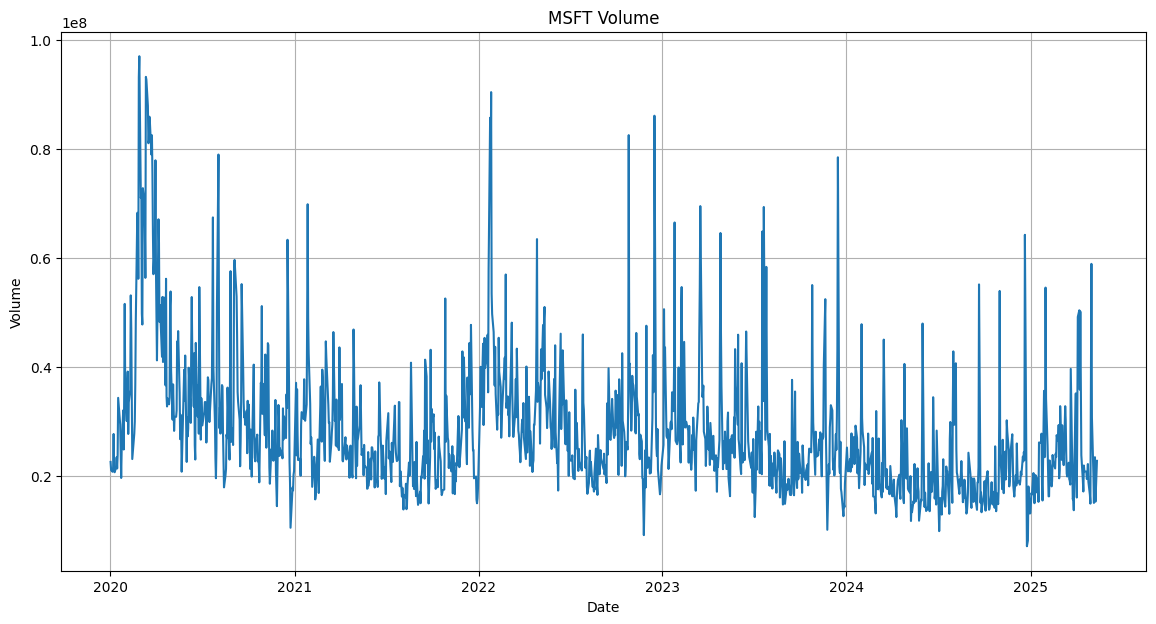

In [6]:
#Volume Analysis
plt.figure(figsize=(14, 7))
plt.plot(data['Volume'])
plt.title(f'{ticker} Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid()
plt.show()


#### On Balance Volume (OBV): เป็นเครื่องมือที่ใช้ในการวัดแรงซื้อและแรงขาย โดยคำนวณจากราคาปิดและปริมาณการซื้อขาย
- ถ้าวันนี้ราคาปิดสูงกว่าเมื่อวาน ให้เพิ่มปริมาณการซื้อขายของวันนี้เข้าไปใน OBV
- ถ้าวันนี้ราคาปิดต่ำกว่าเมื่อวาน ให้หักปริมาณการซื้อขายของวันนี้ออกจาก OBV
- OBV ที่สูงขึ้น แสดงว่ามีแรงซื้อมากกว่าแรงขาย
- OBV ที่ต่ำลง แสดงว่ามีแรงขายมากกว่าแรงซื้อ

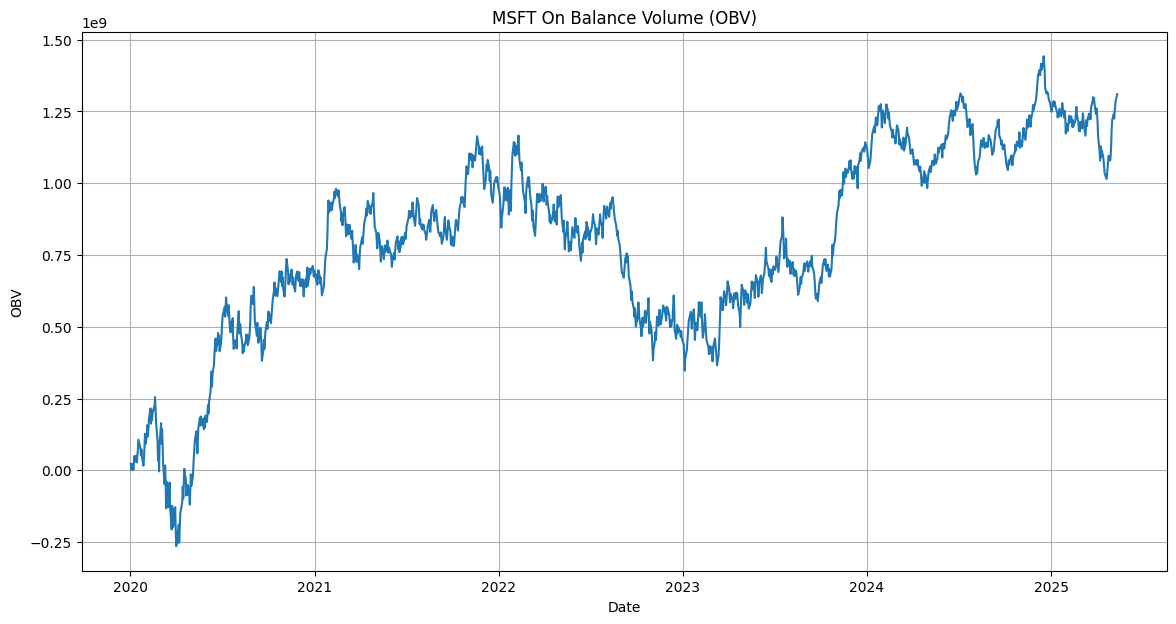

In [7]:
#On Balance Volume (OBV)
data['OBV'] = ta.volume.OnBalanceVolumeIndicator(data['Close'], data['Volume']).on_balance_volume()
plt.figure(figsize=(14, 7))
plt.plot(data['OBV'])
plt.title(f'{ticker} On Balance Volume (OBV)')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.grid()
plt.show()

#### Volume Price Trend (VPT): คล้ายกับ OBV แต่มีการคำนวณที่ซับซ้อนกว่า

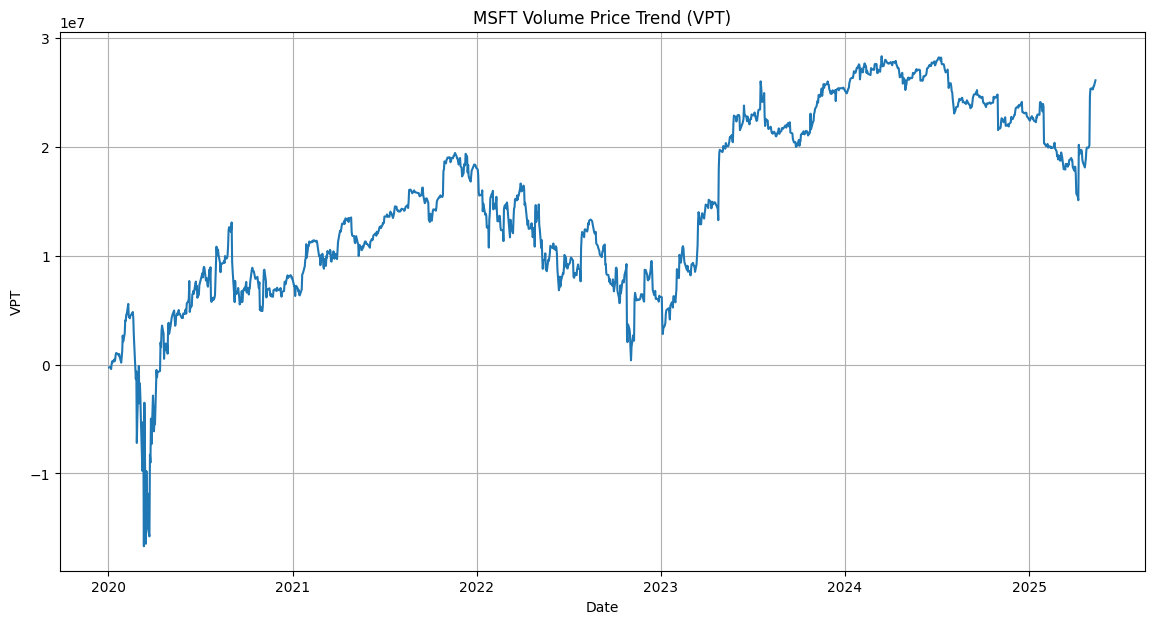

In [8]:
#Volume Price Trend (VPT)
data['VPT'] = ta.volume.VolumePriceTrendIndicator(data['Close'], data['Volume']).volume_price_trend()
plt.figure(figsize=(14, 7))
plt.plot(data['VPT'])
plt.title(f'{ticker} Volume Price Trend (VPT)')
plt.xlabel('Date')
plt.ylabel('VPT')
plt.grid()
plt.show()

#### Accumulation/Distribution Line (A/D Line): วัดแรงซื้อและแรงขาย โดยพิจารณาจากความสัมพันธ์ระหว่างราคาปิดและช่วงราคา (High-Low)

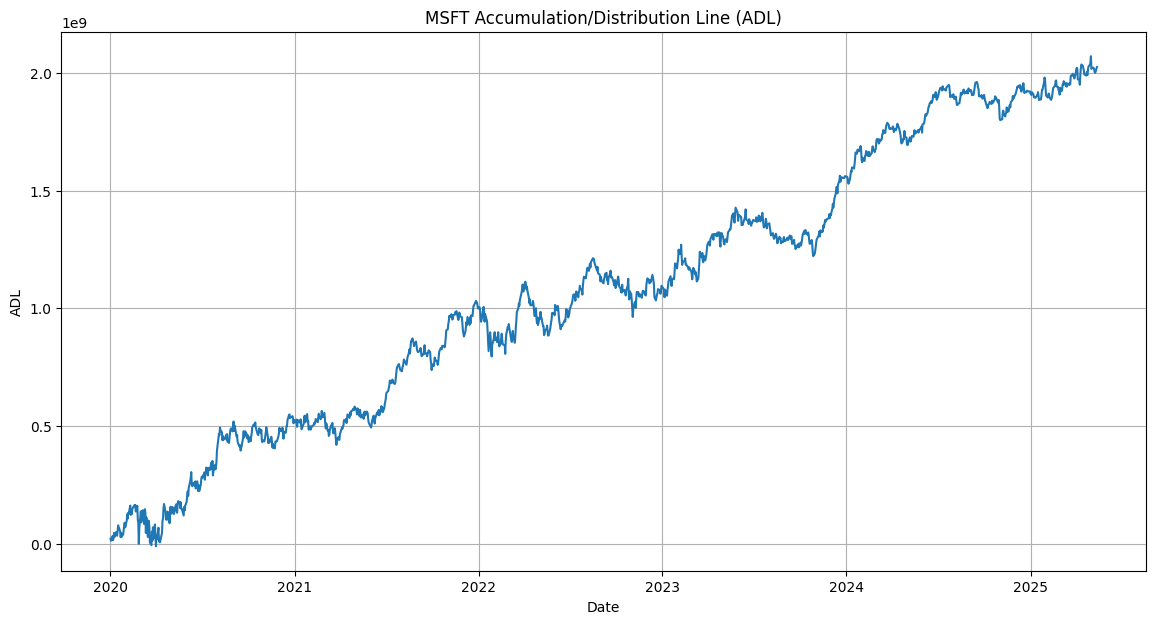

In [ ]:
# Accumulation/Distribution Line (ADL)
data['Money Flow Multiplier'] = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
data['Money Flow Volume'] = data['Money Flow Multiplier'] * data['Volume']
data['ADL'] = data['Money Flow Volume'].cumsum()
#data['ADL'] = ta.volume.acc_dist_index(data['High'], data['Low'], data['Close'], data['Volume'])
plt.figure(figsize=(14, 7))
plt.plot(data['ADL'])
plt.title(f'{ticker} Accumulation/Distribution Line (ADL)')
plt.xlabel('Date')
plt.ylabel('ADL')
plt.grid()
plt.show()